In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Input, Flatten, Dense, MaxPooling2D
#Though we won't be making any neural networks then still why are we including these layers because we don't want the output layer we only need the rest of the knowledge and at the output our output will be there that is only 2 neurons open eyes and closed eyes
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #this is for data augmentation

In [ ]:
# changes la rahe h images mei like rotate kr diya and original mei kuch nahi hoga sbki duplicate banegi hence 5 duplicates banegi ek ki (pata nahi sahi h ya nahi)
# rescale isliye kr rahe h kyunki hamari images bahot badi hai 1./255 means 255 pixels ki krdo (I guess)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.2)

In [ ]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Train', target_size=(80,80), batch_size=8, class_mode='categorical', subset='training' )
#ab hum is train data ko do hisso mei baatenge 1 is train data 80% and 1 is validation data 20%

validation_data = train_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Train', target_size=(80,80), batch_size=8, class_mode='categorical', subset='validation' )

Found 6417 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Test', target_size=(80,80), batch_size=8, class_mode='categorical')

Found 2353 images belonging to 2 classes.


In [ ]:
bmodel = Xception(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))

hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2, activation='softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs = hmodel)
for layer in bmodel.layers:
  layer.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 39, 39, 32)   864         ['input_3[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 39, 39, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation)  (None, 39, 39, 32)   0           ['block1_conv1_bn[0][0]']    

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/mrlEyes_2018_01/Xception', monitor='val_loss', save_best_only=True, verbose=3)

earlystop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [checkpoint, earlystop, learning_rate]

In [ ]:
batchsize = 8

In [ ]:
#isiko baar baar chalana hoga model save krne k baad
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
History = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize, validation_data=validation_data, validation_steps=validation_data.samples//batchsize,
                    callbacks = callbacks, epochs=30)

Epoch 1/30


<ipython-input-18-b80ebd5e01c8>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize, validation_data=validation_data, validation_steps=validation_data.samples//batchsize,


802/802 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8688
Epoch 1: val_loss improved from inf to 0.32723, saving model to /content/drive/MyDrive/mrlEyes_2018_01/Xception


802/802 [==============================] - 2030s 3s/step - loss: 0.3977 - accuracy: 0.8688 - val_loss: 0.3272 - val_accuracy: 0.8569 - lr: 0.0010
Epoch 2/30
802/802 [==============================] - ETA: 0s - loss: 0.2730 - accuracy: 0.8900
Epoch 2: val_loss improved from 0.32723 to 0.27687, saving model to /content/drive/MyDrive/mrlEyes_2018_01/Xception


802/802 [==============================] - 332s 414ms/step - loss: 0.2730 - accuracy: 0.8900 - val_loss: 0.2769 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 3/30
802/802 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.8994
Epoch 3: val_loss improved from 0.27687 to 0.27472, saving model to /content/drive/MyDrive/mrlEyes_2018_01/Xception


802/802 [==============================] - 366s 456ms/step - loss: 0.2461 - accuracy: 0.8994 - val_loss: 0.2747 - val_accuracy: 0.8763 - lr: 0.0010
Epoch 4/30
802/802 [==============================] - ETA: 0s - loss: 0.2398 - accuracy: 0.9022
Epoch 4: val_loss improved from 0.27472 to 0.25316, saving model to /content/drive/MyDrive/mrlEyes_2018_01/Xception


802/802 [==============================] - 357s 446ms/step - loss: 0.2398 - accuracy: 0.9022 - val_loss: 0.2532 - val_accuracy: 0.8956 - lr: 0.0010
Epoch 5/30
802/802 [==============================] - ETA: 0s - loss: 0.2299 - accuracy: 0.9051
Epoch 5: val_loss improved from 0.25316 to 0.22968, saving model to /content/drive/MyDrive/mrlEyes_2018_01/Xception


802/802 [==============================] - 355s 443ms/step - loss: 0.2299 - accuracy: 0.9051 - val_loss: 0.2297 - val_accuracy: 0.9050 - lr: 0.0010
Epoch 6/30
802/802 [==============================] - ETA: 0s - loss: 0.2292 - accuracy: 0.9087
Epoch 6: val_loss improved from 0.22968 to 0.20908, saving model to /content/drive/MyDrive/mrlEyes_2018_01/Xception


802/802 [==============================] - 356s 443ms/step - loss: 0.2292 - accuracy: 0.9087 - val_loss: 0.2091 - val_accuracy: 0.9181 - lr: 0.0010
Epoch 7/30
802/802 [==============================] - ETA: 0s - loss: 0.2145 - accuracy: 0.9129
Epoch 7: val_loss did not improve from 0.20908
802/802 [==============================] - 313s 390ms/step - loss: 0.2145 - accuracy: 0.9129 - val_loss: 0.2516 - val_accuracy: 0.9050 - lr: 0.0010
Epoch 8/30
802/802 [==============================] - ETA: 0s - loss: 0.2037 - accuracy: 0.9154
Epoch 8: val_loss did not improve from 0.20908
802/802 [==============================] - 334s 417ms/step - loss: 0.2037 - accuracy: 0.9154 - val_loss: 0.2829 - val_accuracy: 0.8856 - lr: 0.0010
Epoch 9/30
802/802 [==============================] - ETA: 0s - loss: 0.2030 - accuracy: 0.9181
Epoch 9: val_loss did not improve from 0.20908

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
802/802 [==============================] - 334s 4

In [ ]:
print(History.history)

{'loss': [0.39768123626708984, 0.2729526162147522, 0.24608072638511658, 0.23980264365673065, 0.22987166047096252, 0.22922539710998535, 0.21454787254333496, 0.20368270576000214, 0.20301783084869385, 0.1773742437362671, 0.1729557067155838, 0.16407272219657898, 0.16648077964782715], 'accuracy': [0.8687782883644104, 0.8899984359741211, 0.8993602991104126, 0.9021688103675842, 0.9051334261894226, 0.9087221026420593, 0.9129349589347839, 0.9154314398765564, 0.9180839657783508, 0.9249492883682251, 0.9285379648208618, 0.9321267008781433, 0.9293181300163269], 'val_loss': [0.3272334337234497, 0.27686986327171326, 0.27471765875816345, 0.2531569302082062, 0.22967563569545746, 0.20907825231552124, 0.2516247630119324, 0.2828527092933655, 0.2348274439573288, 0.22408728301525116, 0.23326103389263153, 0.24433253705501556, 0.22171750664710999], 'val_accuracy': [0.8568750023841858, 0.8799999952316284, 0.8762500286102295, 0.8956249952316284, 0.9049999713897705, 0.9181249737739563, 0.9049999713897705, 0.8856

In [ ]:
model.save('/content/drive/MyDrive/mrlEyes_2018_01/Xception/myModel/xception_model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
new_model = load_model('/content/drive/MyDrive/mrlEyes_2018_01/Xception/myModel/xception_model.h5')

In [ ]:
acc_train, loss_train = new_model.evaluate_generator(train_data, steps = 16)
print(acc_train)
print(loss_train)

<ipython-input-23-bafa75701154>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_train, loss_train = new_model.evaluate_generator(train_data, steps = 16)


0.17195650935173035
0.9296875


In [ ]:
acc_valid, loss_valid = new_model.evaluate_generator(validation_data, steps = 16)
print(acc_valid)
print(loss_valid)

<ipython-input-24-78fa9828eb6f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_valid, loss_valid = new_model.evaluate_generator(validation_data, steps = 16)


0.20881229639053345
0.9296875


In [ ]:
acc_test, loss_test = new_model.evaluate_generator(test_data, steps = 16)
print(acc_test)
print(loss_test)

<ipython-input-25-2f97bf039bca>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_test, loss_test = new_model.evaluate_generator(test_data, steps = 16)


0.2618076801300049
0.90625


In [ ]:
_history = History.history
print(_history)

{'loss': [0.39768123626708984, 0.2729526162147522, 0.24608072638511658, 0.23980264365673065, 0.22987166047096252, 0.22922539710998535, 0.21454787254333496, 0.20368270576000214, 0.20301783084869385, 0.1773742437362671, 0.1729557067155838, 0.16407272219657898, 0.16648077964782715], 'accuracy': [0.8687782883644104, 0.8899984359741211, 0.8993602991104126, 0.9021688103675842, 0.9051334261894226, 0.9087221026420593, 0.9129349589347839, 0.9154314398765564, 0.9180839657783508, 0.9249492883682251, 0.9285379648208618, 0.9321267008781433, 0.9293181300163269], 'val_loss': [0.3272334337234497, 0.27686986327171326, 0.27471765875816345, 0.2531569302082062, 0.22967563569545746, 0.20907825231552124, 0.2516247630119324, 0.2828527092933655, 0.2348274439573288, 0.22408728301525116, 0.23326103389263153, 0.24433253705501556, 0.22171750664710999], 'val_accuracy': [0.8568750023841858, 0.8799999952316284, 0.8762500286102295, 0.8956249952316284, 0.9049999713897705, 0.9181249737739563, 0.9049999713897705, 0.8856

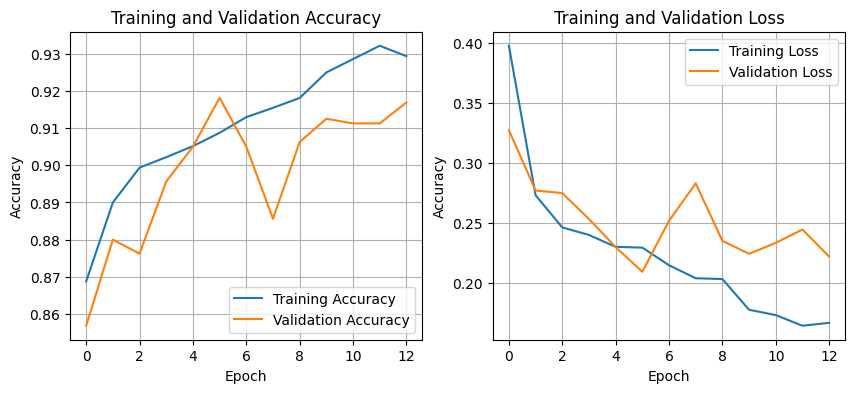

In [ ]:
import matplotlib.pyplot as plt
epochs = 13

acc = _history['accuracy']
val_acc = _history['val_accuracy']

loss = _history['loss']
val_loss = _history['val_loss']

epochs_range = range(epochs)
#plot traing and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

#plot traing and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [ ]:
Model_1 = load_model('/content/drive/MyDrive/mrlEyes_2018_01/_models_/partial/final.h5')
Model_2 = load_model('/content/drive/MyDrive/mrlEyes_2018_01/VGG16/myModel/vgg16_model.h5')
Model_3 = new_model


13


In [ ]:
Model_1_train_loss = [0.2071574330329895, 0.20076671242713928, 0.19267617166042328, 0.19276277720928192, 0.18934640288352966,
                      0.18959929049015045, 0.19007988274097443, 0.17610451579093933, 0.1696189045906067, 0.16396084427833557,
                      0.15381568670272827, 0.1540772169828415, 0.16481758654117584]

Model_1_train_accuracy = [0.9212045669555664, 0.9229208827018738, 0.9232329726219177, 0.9254173636436462, 0.9294741749763489,
                          0.924481213092804, 0.9260414838790894, 0.9313465356826782, 0.9343111515045166, 0.9352473020553589, 0.9369636178016663,
                          0.9386799931526184, 0.9368076324462891]

Model_1_valid_loss = [0.25272542238235474, 0.27473559975624084, 0.22864343225955963, 0.2529691457748413,
                      0.22717688977718353, 0.26981329917907715, 0.22893579304218292, 0.24838802218437195,
                      0.23009958863258362, 0.21688047051429749, 0.22924141585826874, 0.22876042127609253, 0.20817141234874725]

Model_1_valid_accuracy = [0.8912500143051147, 0.8956249952316284, 0.9075000286102295, 0.8993750214576721,
                          0.9043750166893005, 0.8993750214576721, 0.9081249833106995, 0.9006249904632568,
                          0.9068750143051147, 0.9049999713897705, 0.9081249833106995, 0.909375011920929, 0.9175000190734863]

print(len(Model_1_train_loss), len(Model_1_train_accuracy), len(Model_1_valid_loss), len(Model_1_valid_accuracy))

Model_2_train_loss = [0.5129, 0.3891, 0.3733, 0.3439, 0.3354, 0.3179, 0.3152, 0.3140, 0.3068, 0.2760, 0.2663, 0.2608, 0.2693]

Model_2_train_accuracy = [0.7391, 0.8201, 0.8306, 0.8457, 0.8480, 0.8577, 0.8639, 0.8618, 0.8663, 0.8834, 0.8914, 0.8930, 0.8903]

Model_2_valid_loss = [0.6553, 0.5875, 0.4916, 0.4593, 0.4727, 0.4353, 0.4596, 0.4628, 0.4461, 0.4190, 0.4124, 0.4510, 0.4298]

Model_2_valid_accuracy = [0.5725, 0.6156, 0.7738, 0.7956, 0.7437, 0.8125, 0.7713, 0.7688, 0.7987, 0.8075, 0.8000, 0.7894, 0.8087]

print(len(Model_2_train_loss), len(Model_2_train_accuracy), len(Model_2_valid_loss), len(Model_2_valid_accuracy))

Model_3_train_loss = _history['loss']

Model_3_train_accuracy = _history['accuracy']

Model_3_valid_loss = _history['val_loss']

Model_3_valid_accuracy = _history['val_accuracy']

print(len(Model_3_train_loss), len(Model_3_train_accuracy), len(Model_3_valid_loss), len(Model_3_valid_accuracy))


13 13 13 13
13 13 13 13
13 13 13 13


FINAL COMPARISON

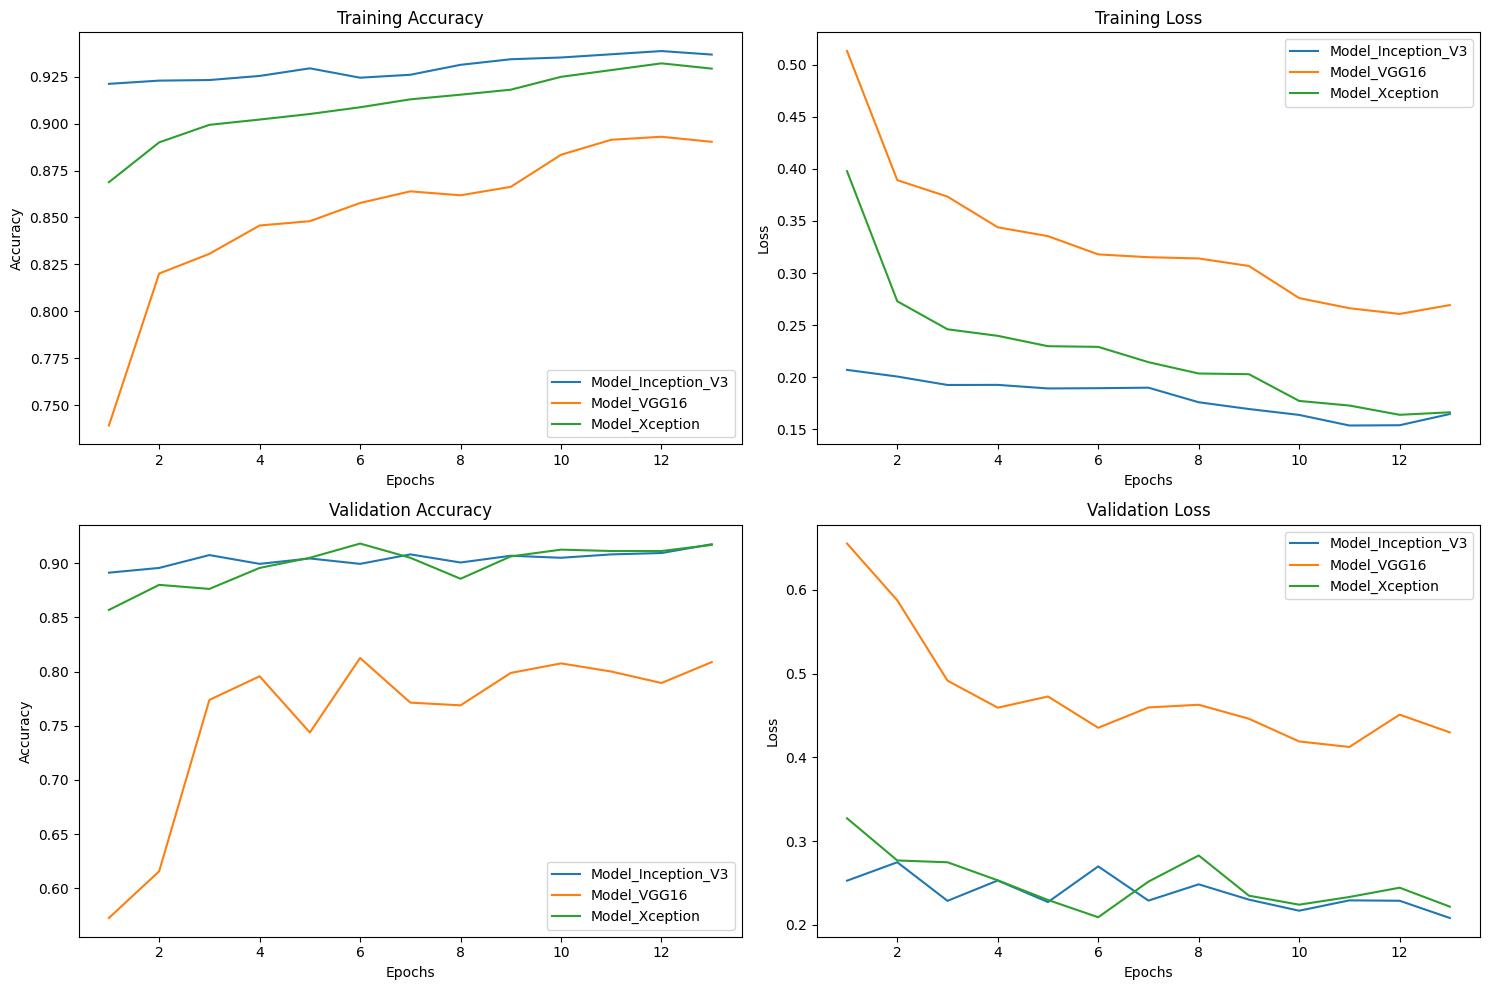

In [ ]:
import matplotlib.pyplot as plt

# Example data
model_names = ['Model_Inception_V3','Model_VGG16', 'Model_Xception']
epochs = range(1, 14)  # Assuming 13 epochs for illustration

# Training metrics (accuracy and loss)
train_accuracy = [Model_1_train_accuracy, Model_2_train_accuracy, Model_3_train_accuracy]

train_loss = [Model_1_train_loss, Model_2_train_loss, Model_3_train_loss]

# Validation metrics (accuracy and loss)
val_accuracy = [Model_1_valid_accuracy, Model_2_valid_accuracy, Model_3_valid_accuracy]

val_loss = [Model_1_valid_loss, Model_2_valid_loss, Model_3_valid_loss]

# Test metrics (accuracy and loss)
test_accuracy = [0.953125, 0.921875, 0.90625]
test_loss = [0.13871482014656067, 0.2124611884355545, 0.2618076801300049]

# Plotting
plt.figure(figsize=(15, 10))

# Training Accuracy
plt.subplot(2, 2, 1)
for i in range(len(model_names)):
    plt.plot(epochs, train_accuracy[i], label=f'{model_names[i]}')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training Loss
plt.subplot(2, 2, 2)
for i in range(len(model_names)):
    plt.plot(epochs, train_loss[i], label=f'{model_names[i]}')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Validation Accuracy
plt.subplot(2, 2, 3)
for i in range(len(model_names)):
    plt.plot(epochs, val_accuracy[i], label=f'{model_names[i]}')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Validation Loss
plt.subplot(2, 2, 4)
for i in range(len(model_names)):
    plt.plot(epochs, val_loss[i], label=f'{model_names[i]}')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting Test
